# Content
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

# Inspiration
This relatively simple dataset should be an excellent starting point for EDA, Statistical Analysis and Hypothesis testing and training Linear Regression models for predicting Insurance Premium Charges.

# Proposed Tasks:

Exploratory Data Analytics
Statistical hypothesis testing
Statistical Modeling
Linear Regression

In [100]:
# data pre-processing
import os
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# statistical libraries
import scipy.stats as stats

# Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Load the dataset
df = pd.read_csv('insurance.csv')
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())
print(df.columns)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   i

# Exploratory Data Analysis

In [102]:
# gives information about numerical columns
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


General observation:
* high number of data points with a higher BMI value. 
* The data is faily normally distributed when it comes to age and bmi.

In [103]:
# THe mean of charges is higher than the median, indicating a skewed data distribution
skewness = df['charges'].skew()
# skewness value greater than +0.5 indicates right skewed and less than -0.5 indicates left skewed
print(skewness)

1.5158796580240388


The data is right skewed

In [104]:
# let's calculate the upper and lower bounds and check for outliers
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [105]:
# Identify outliers
lower_outliers = df[df['charges'] < lower_bound]
upper_outliers = df[df['charges'] > upper_bound]
print(f"Lower outliers:\n{lower_outliers}")
print(f"Upper outliers:\n{upper_outliers}")

Lower outliers:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Upper outliers:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


The data does not have outliers on the lower end but has 139 outliers on the upper end; however from first glance high charges seem to coorelate with smoking and high bmi. Doesnot need to drop the outliers.

In [106]:
# Categorical values
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df[col].unique()}")
    print(f"counts:")
    print(df[col].value_counts())
    print(f"Percentage distribution:")
    print((df[col].value_counts(normalize=True) * 100).round(2))


SEX:
Unique values: ['female' 'male']
counts:
sex
male      676
female    662
Name: count, dtype: int64
Percentage distribution:
sex
male      50.52
female    49.48
Name: proportion, dtype: float64

SMOKER:
Unique values: ['yes' 'no']
counts:
smoker
no     1064
yes     274
Name: count, dtype: int64
Percentage distribution:
smoker
no     79.52
yes    20.48
Name: proportion, dtype: float64

REGION:
Unique values: ['southwest' 'southeast' 'northwest' 'northeast']
counts:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Percentage distribution:
region
southeast    27.20
southwest    24.29
northwest    24.29
northeast    24.22
Name: proportion, dtype: float64


Sex and region seems to be fairly normally distributed.

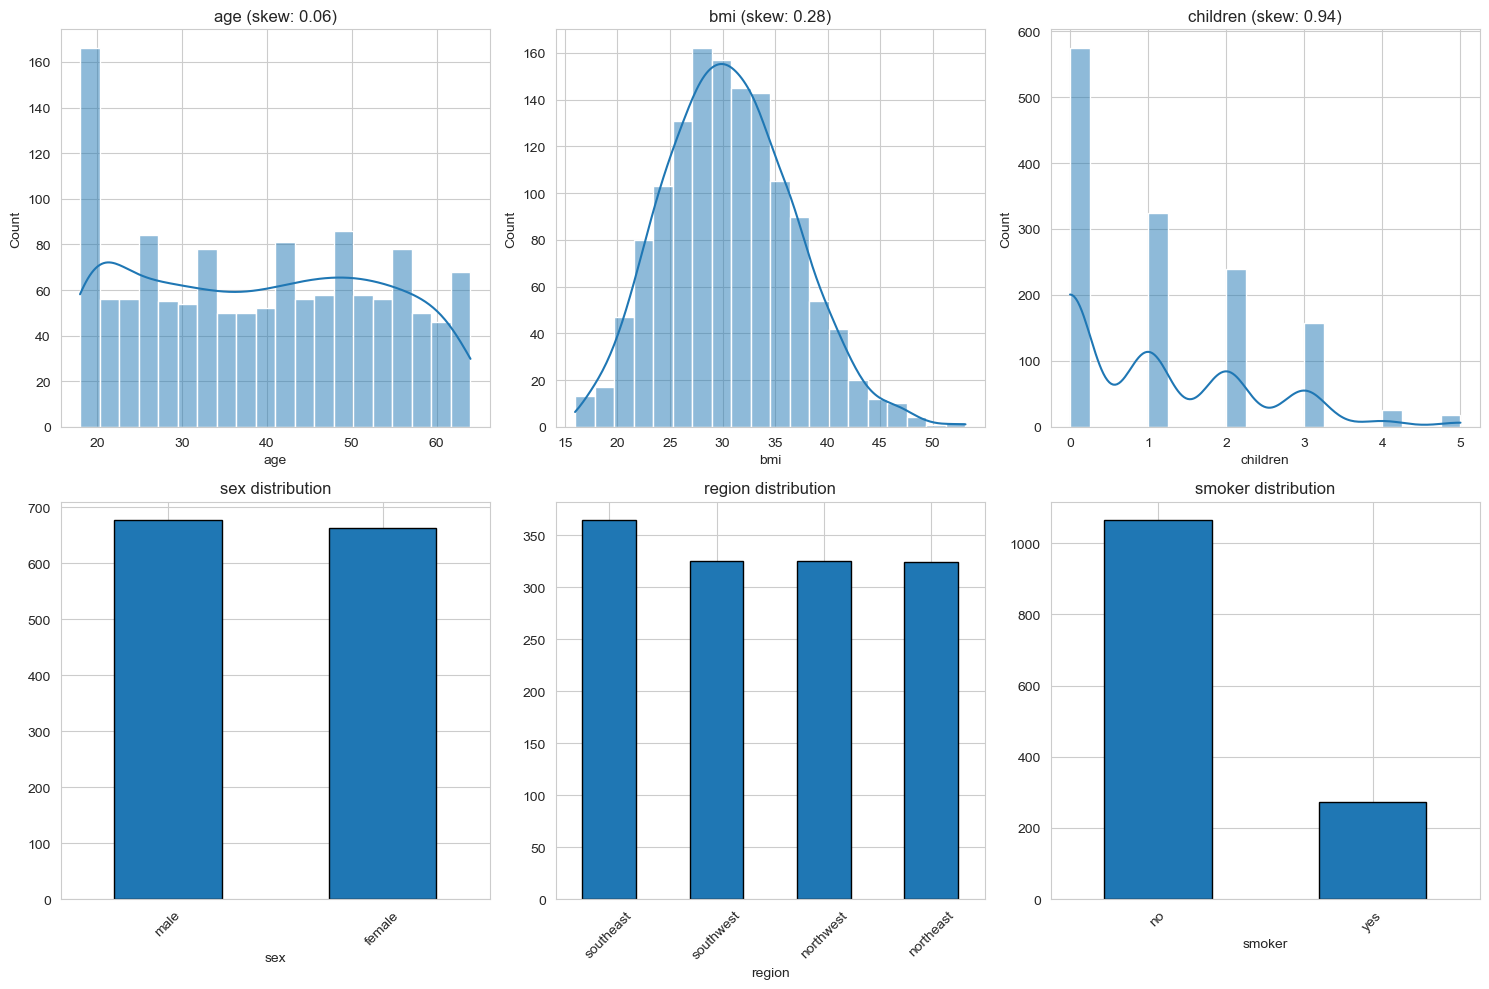

In [107]:
# Distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Numerical columns: 
for idx, col in enumerate(['age', 'bmi', 'children']):
    sns.histplot(df[col], kde=True, ax=axes[0, idx], bins=20)
    axes[0, idx].set_title(f'{col} (skew: {df[col].skew():.2f})')

# Categorical columns: 
for idx, col in enumerate(['sex', 'region', 'smoker']):
    df[col].value_counts().plot(kind='bar', ax=axes[1, idx], edgecolor='black')
    axes[1, idx].set_title(f'{col} distribution')
    axes[1, idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

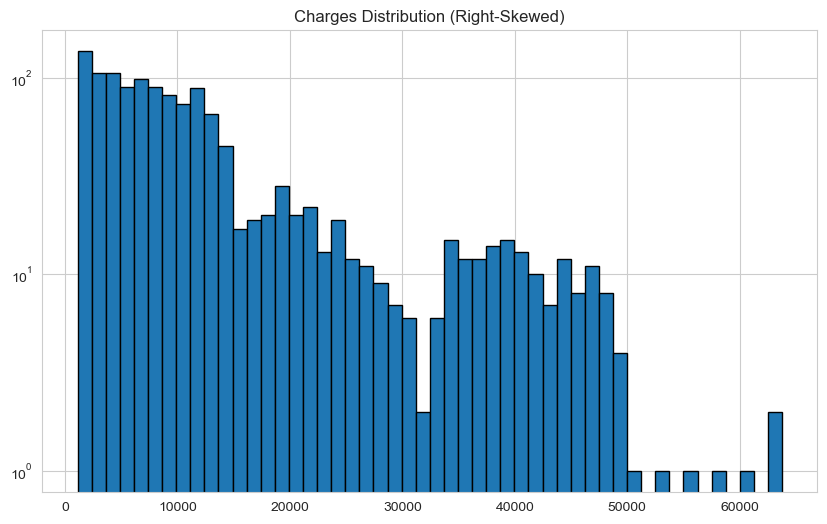

In [108]:
# charges distribution
plt.hist(df['charges'], bins=50, edgecolor='black')
plt.yscale('log')  # Log scale because data is skewed
plt.title('Charges Distribution (Right-Skewed)')
plt.show()

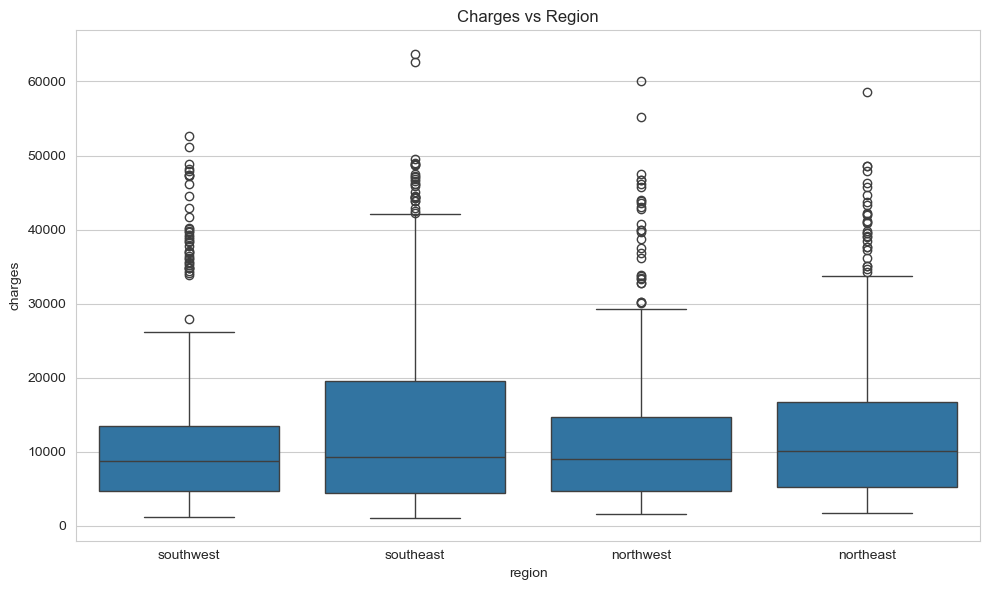

In [109]:
# Charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Charges vs Region')
plt.tight_layout()
plt.show()

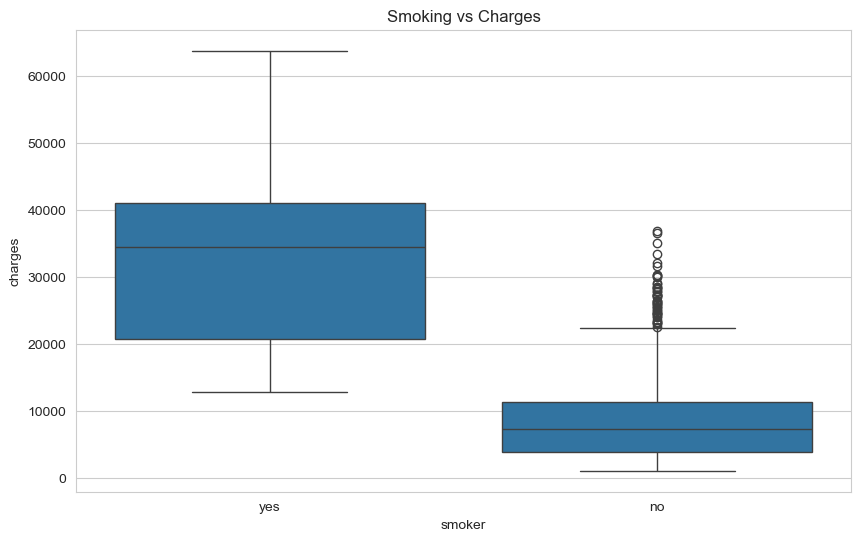

In [110]:
# Smoking vs Charges boxplot
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoking vs Charges')
plt.show()

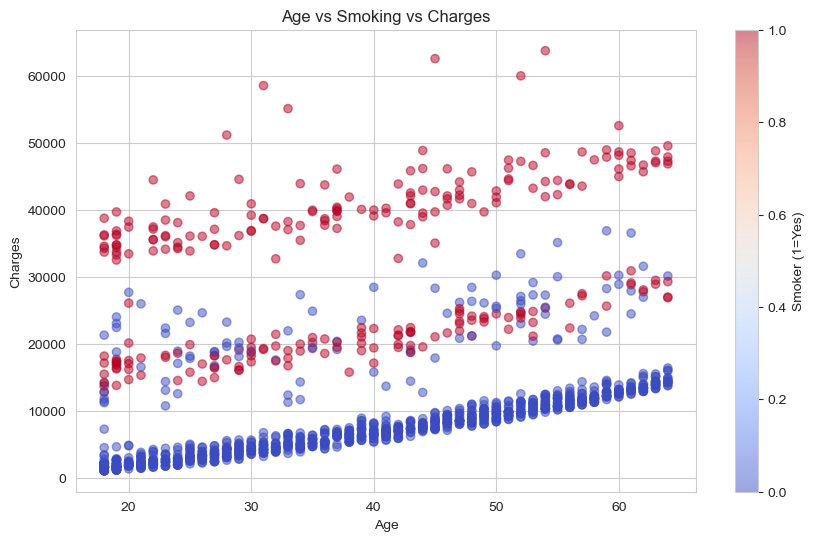

In [111]:
# BMI vs Charges, colored by smoking
plt.scatter(df['age'], df['charges'], c=df['smoker'].map({'yes': 1, 'no': 0}), 
            alpha=0.5, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Smoking vs Charges')
plt.colorbar(label='Smoker (1=Yes)')
plt.show()

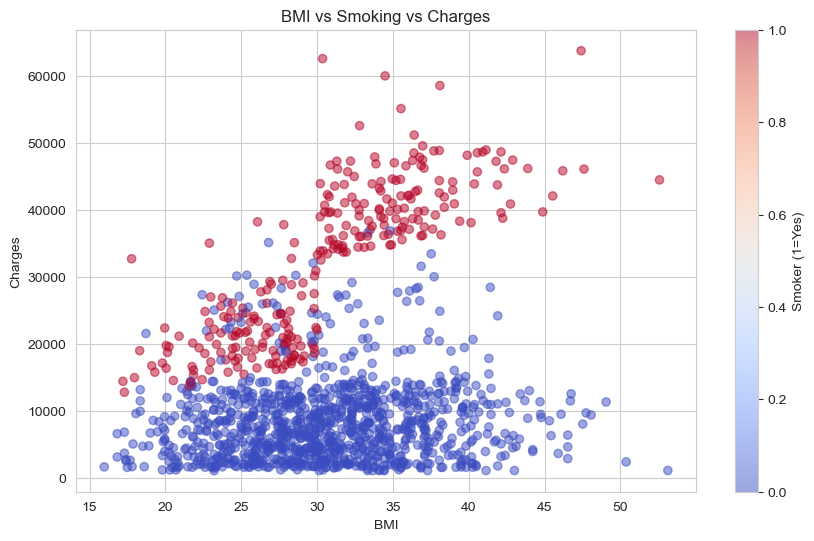

In [112]:
# BMI vs Charges, colored by smoking
plt.scatter(df['bmi'], df['charges'], c=df['smoker'].map({'yes': 1, 'no': 0}), 
            alpha=0.5, cmap='coolwarm')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Smoking vs Charges')
plt.colorbar(label='Smoker (1=Yes)')
plt.show()

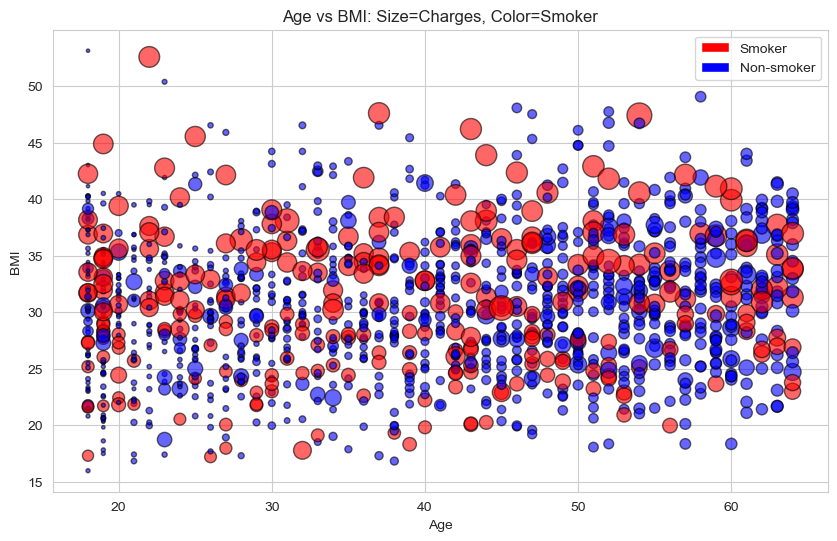

In [113]:
scatter = plt.scatter(df['age'], df['bmi'], 
                     s=df['charges']/200,  # Size = charges
                     c=df['smoker'].map({'yes': 'red', 'no': 'blue'}),
                     alpha=0.6, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI: Size=Charges, Color=Smoker')
legend_elements = [Patch(facecolor='red', label='Smoker'),
                   Patch(facecolor='blue', label='Non-smoker')]
plt.legend(handles=legend_elements)
plt.show()

In [114]:
# encoding categorical variables for correlation analysis
df_encoded = df.copy()
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})

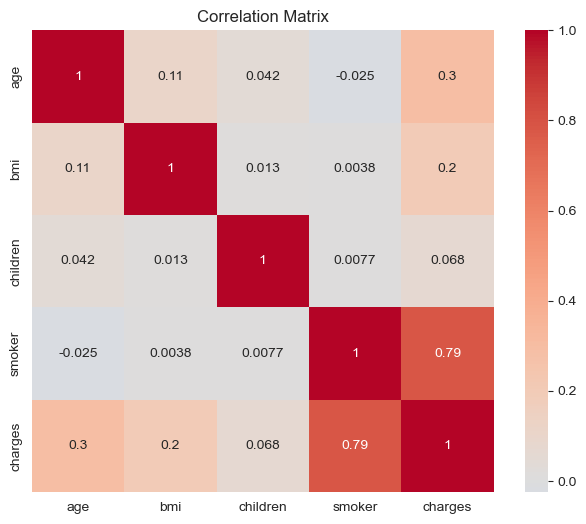

In [115]:
# correlation matrix
corr_matrix = df_encoded[['age', 'bmi', 'children', 'smoker', 'charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')
plt.show()

Smoking is highly correlated with charges which children has very weak correlation and can be dropped. 

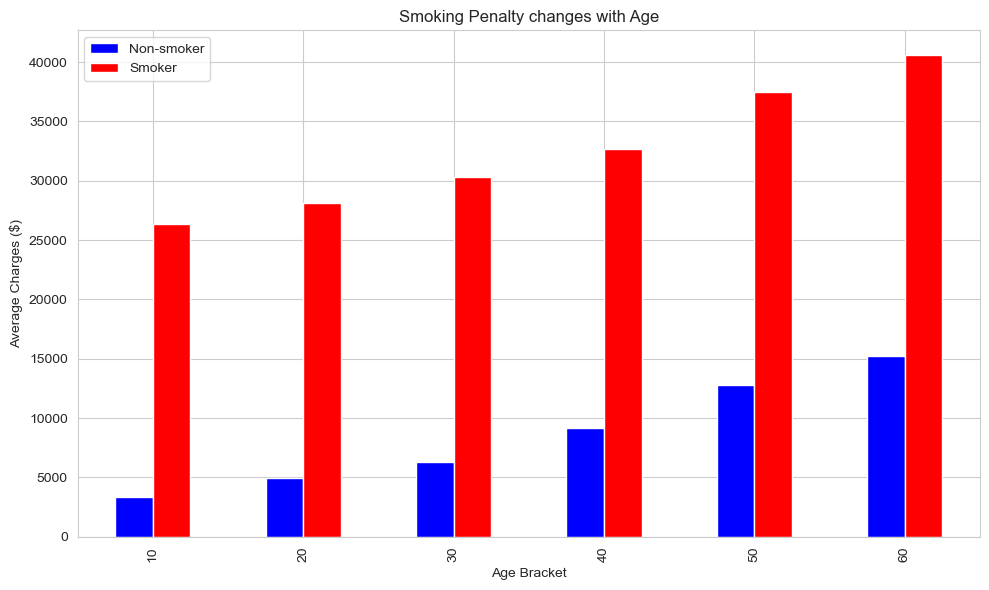

In [116]:
# Calculate averages by decade
df['age_bracket'] = (df['age'] // 10) * 10
averages = df.groupby(['age_bracket', 'smoker'])['charges'].mean().unstack()

averages.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Age Bracket')
plt.ylabel('Average Charges ($)')
plt.title('Smoking Penalty changes with Age')
plt.legend(['Non-smoker', 'Smoker'])
plt.tight_layout()
plt.show()

Train and test split

In [117]:
# drop the dependent variable
X = df.drop('charges', axis=1) 
y = df['charges'] 
print(X.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age_bracket'], dtype='object')


In [118]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=261,   # Reproducibility
    shuffle=True
)

In [119]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 1070 samples
Test set: 268 samples


Encode categorical variable

In [120]:
print(X_train.columns)
# categorical columns = sex, smoker, region
print(X_train.dtypes)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age_bracket'], dtype='object')
age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
age_bracket      int64
dtype: object


In [121]:
cols = ['sex', 'smoker', 'region']
X_train[cols] = X_train[cols].astype('category')
print(X_train.dtypes)

age               int64
sex            category
bmi             float64
children          int64
smoker         category
region         category
age_bracket       int64
dtype: object


In [122]:
# Categorical values
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {X_train[col].unique()}")
    print(f"counts:")
    print(X_train[col].value_counts())
    print(f"Percentage distribution:")
    print((X_train[col].value_counts(normalize=True) * 100).round(2))


SEX:
Unique values: ['male', 'female']
Categories (2, object): ['female', 'male']
counts:
sex
male      542
female    528
Name: count, dtype: int64
Percentage distribution:
sex
male      50.65
female    49.35
Name: proportion, dtype: float64

SMOKER:
Unique values: ['no', 'yes']
Categories (2, object): ['no', 'yes']
counts:
smoker
no     854
yes    216
Name: count, dtype: int64
Percentage distribution:
smoker
no     79.81
yes    20.19
Name: proportion, dtype: float64

REGION:
Unique values: ['northeast', 'northwest', 'southwest', 'southeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
counts:
region
southeast    298
northeast    261
southwest    257
northwest    254
Name: count, dtype: int64
Percentage distribution:
region
southeast    27.85
northeast    24.39
southwest    24.02
northwest    23.74
Name: proportion, dtype: float64


In [123]:
# train
X_train['sex_enc'] = X_train['sex'].map({'male': 0, 'female': 1})
X_train['smoker_enc'] = X_train['smoker'].map({'no': 0, 'yes': 1})

# test
X_test['sex_enc'] = X_test['sex'].map({'male': 0, 'female': 1})
X_test['smoker_enc'] = X_test['smoker'].map({'no': 0, 'yes': 1})

In [124]:
# le = LabelEncoder()
# X_train['ageb_le'] = le.fit_transform(X_train['age_bracket'])

In [125]:
# Creating an encoder that handles unknown categories
encoder = OneHotEncoder(
    drop='first',           # Avoid dummy trap
    sparse_output=False,    # Get array
    handle_unknown='ignore' # ignore new categories
)

In [126]:
encoder.fit(X_train[['region']]) # Fit ONLY on training
# Transform both
train_region = encoder.transform(X_train[['region']])
test_region = encoder.transform(X_test[['region']])

In [127]:
region_columns = encoder.get_feature_names_out(['region'])

In [128]:
train_region_df = pd.DataFrame(
    train_region, 
    columns=region_columns,
    index=X_train.index  # Keep same index
)

test_region_df = pd.DataFrame(
    test_region,
    columns=region_columns,
    index=X_test.index
)

In [129]:
train_region_df

,region_northwest,region_southeast,region_southwest
685,0.0,0.0,0.0
75,1.0,0.0,0.0
897,1.0,0.0,0.0
1206,0.0,0.0,1.0
243,0.0,0.0,1.0
...,...,...,...
849,1.0,0.0,0.0
659,0.0,0.0,0.0
803,0.0,1.0,0.0
1306,0.0,0.0,0.0


In [130]:
X_train = pd.concat([X_train, train_region_df], axis=1)
X_test = pd.concat([X_test, test_region_df], axis=1)

In [131]:
X_train

,age,sex,bmi,children,smoker,region,age_bracket,sex_enc,smoker_enc,region_northwest,region_southeast,region_southwest
685,53,male,26.410,2,no,northeast,50,0,0,0.0,0.0,0.0
75,57,male,34.010,0,no,northwest,50,0,0,1.0,0.0,0.0
897,19,male,25.555,1,no,northwest,10,0,0,1.0,0.0,0.0
1206,59,female,34.800,2,no,southwest,50,1,0,0.0,0.0,1.0
243,40,male,35.300,3,no,southwest,40,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
849,55,male,32.775,0,no,northwest,50,0,0,1.0,0.0,0.0
659,57,female,28.785,4,no,northeast,50,1,0,0.0,0.0,0.0
803,18,female,42.240,0,yes,southeast,10,1,1,0.0,1.0,0.0
1306,29,female,21.850,0,yes,northeast,20,1,1,0.0,0.0,0.0


In [132]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age_bracket',
       'sex_enc', 'smoker_enc', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [134]:
drp_col = ['age_bracket', 'sex', 'smoker', 'region']

X_train = X_train.drop(drp_col, axis=1)
X_test = X_test.drop(drp_col, axis=1)

In [135]:
X_train.head()

,age,bmi,children,sex_enc,smoker_enc,region_northwest,region_southeast,region_southwest
685,53,26.410,2,0,0,0.0,0.0,0.0
75,57,34.010,0,0,0,1.0,0.0,0.0
897,19,25.555,1,0,0,1.0,0.0,0.0
1206,59,34.800,2,1,0,0.0,0.0,1.0
243,40,35.300,3,0,0,0.0,0.0,1.0


In [136]:
scaler = StandardScaler()
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [137]:
X_train.head()

,age,bmi,children,sex_enc,smoker_enc,region_northwest,region_southeast,region_southwest
685,0.987908,-0.703563,0.768743,0,0,0.0,0.0,0.0
75,1.273137,0.537158,-0.896349,0,0,1.0,0.0,0.0
897,-1.436545,-0.843144,-0.063803,0,0,1.0,0.0,0.0
1206,1.415752,0.666128,0.768743,1,0,0.0,0.0,1.0
243,0.060911,0.747754,1.601289,0,0,0.0,0.0,1.0


Ordinary least squares

In [139]:
ols = LinearRegression()
ols.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [146]:
# Understanding the ols model
print(f"• Intercept (βo): ${ols.intercept_:,.2f}")
print(f"• Number of coefficients (β2, β2...βn): {len(ols.coef_)}")

• Intercept (βo): $8,601.45
• Number of coefficients (β2, β2...βn): 8


In [ ]:
# table of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ols.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

            Feature   Coefficient
4        smoker_enc  24433.153417
0               age   3653.041549
1               bmi   2076.160913
6  region_southeast  -1042.415936
7  region_southwest   -513.390632
2          children    457.450753
3           sex_enc    260.221058
5  region_northwest      8.058846


In [152]:
y_pred_train = ols.predict(X_train)
y_pred_test = ols.predict(X_test)

In [164]:
# Calculate metrics for train and test redictions
def cal_metrics(y_true, y_pred, dataset):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Dataset': dataset,
        'Mean square error': mse,
        'Root MSE': rmse,
        'Mean absolute error': mae,
        'R squared': r2
    }

In [168]:
# Calculate for train and test
train_metrics = cal_metrics(y_train, y_pred_train, 'Training')
test_metrics = cal_metrics(y_test, y_pred_test, 'Test')

In [169]:
# comparison table
metrics_df = pd.DataFrame([train_metrics, test_metrics])
print(metrics_df)

    Dataset  Mean square error     Root MSE  Mean absolute error  R squared
0  Training       3.570088e+07  5975.021557          4107.151654   0.763501
1      Test       4.025269e+07  6344.500887          4322.899792   0.687763


* Mean squared error measures the average squared difference between actual and predicted values. 
* Root mean squared error is just the square root of MSE. My RMSE of $6,345 means on average, my predictions are off by about six grand. 
* Mean absolute error is simpler, it is the average of absolute errors without squaring. The MAE of $4,323 is lower than RMSE means that my model has dome bad predictions(higher difference between real and predicted) mixed with mostly okay ones.
* R-squared gives information on how much percentage of charge variation my model explains.
           0.688 = 69% explained, 31% unexplained.
* My training R² at 0.764 vs test at 0.688 showing only a 7-8% drop. Meaning the model isn't overfitting too much.

In [170]:
# Find the worst predictions
errors = abs(y_test - y_pred_test)
worst_indices = errors.nlargest(10).index

print("Top 10 Worst Predictions:")
print("=" * 60)
for idx in worst_indices:
    actual = y_test.loc[idx]
    predicted = y_pred_test[y_test.index.get_loc(idx)]
    error = actual - predicted
    
    print(f"\nActual: ${actual:,.0f} | Predicted: ${predicted:,.0f} | Error: ${error:,.0f}")
    
    # Check if this person is a smoker
    is_smoker = X_test.loc[idx, 'smoker_enc'] == 1
    print(f"Smoker: {is_smoker} | Age: {X_test.loc[idx, 'age']:.1f} std | BMI: {X_test.loc[idx, 'bmi']:.1f} std")

Top 10 Worst Predictions:

Actual: $58,571 | Predicted: $33,644 | Error: $24,928
Smoker: True | Age: -0.6 std | BMI: 1.2 std

Actual: $27,376 | Predicted: $4,800 | Error: $22,576
Smoker: False | Age: -0.4 std | BMI: -1.4 std

Actual: $32,109 | Predicted: $9,884 | Error: $22,225
Smoker: False | Age: 0.3 std | BMI: -0.2 std

Actual: $36,580 | Predicted: $15,510 | Error: $21,070
Smoker: False | Age: 1.6 std | BMI: 0.4 std

Actual: $22,396 | Predicted: $2,806 | Error: $19,590
Smoker: False | Age: -1.2 std | BMI: -1.1 std

Actual: $26,237 | Predicted: $8,121 | Error: $18,115
Smoker: False | Age: 0.6 std | BMI: -1.1 std

Actual: $30,260 | Predicted: $12,904 | Error: $17,356
Smoker: False | Age: 1.5 std | BMI: -0.3 std

Actual: $29,186 | Predicted: $13,358 | Error: $15,829
Smoker: False | Age: 1.0 std | BMI: 0.3 std

Actual: $28,477 | Predicted: $12,690 | Error: $15,787
Smoker: False | Age: 0.1 std | BMI: 1.7 std

Actual: $25,657 | Predicted: $10,140 | Error: $15,516
Smoker: False | Age: 0.8 

In [171]:
# Check average error by smoker status
print("Average Absolute Error by Group:")
print("=" * 40)

for smoker_status in [0, 1]:
    mask = X_test['smoker_enc'] == smoker_status
    group_errors = errors[mask]
    group_actual = y_test[mask]
    
    print(f"\n{'Non-smokers' if smoker_status == 0 else 'Smokers'}:")
    print(f"  Count: {len(group_errors)}")
    print(f"  Avg error: ${group_errors.mean():,.0f}")
    print(f"  Avg actual charges: ${group_actual.mean():,.0f}")
    print(f"  Max error: ${group_errors.max():,.0f}")

Average Absolute Error by Group:

Non-smokers:
  Count: 210
  Avg error: $3,116
  Avg actual charges: $8,857
  Max error: $22,576

Smokers:
  Count: 58
  Avg error: $8,691
  Avg actual charges: $29,618
  Max error: $24,928
